In [26]:
import os, importlib, sys, time

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [28]:
import scipy.linalg as la
import scipy.stats as stats
import scipy.optimize as opt

In [29]:
import freqepid

# 1. parameters

In [30]:
T = 60
T0 = 40

In [31]:
GPi = np.load('data/GPi.npz')

## observation parameters

In [8]:
alpha = 0.01
r_Y = 10

$$Y_t = NegBinom( \frac{EY_t}{r_Y + EY_t}, r_Y )$$

$$ EY_t = \alpha\sum_{s=1}^{t-1} I_s \pi_{t-s} $$

## latent parameters

In [9]:
d = 2
beta = np.array([0, -2.2])

In [10]:
r_I = 100
K = 6.5

$$I_t = NegBinom( \frac{EI_t}{r_I + EI_t}, r_I )$$

$$ EI_t = R(\bar{A}_t, \beta) \sum_{s=1}^{t-1} I_s g_{t-s} $$

$$R(\bar{A}_t, \beta) = \frac{K}{1+\exp(- \beta^\top A_t)}$$

## seed values

In [12]:
mu = np.log(100)

$$I_{[-T_0,0)} = \exp(\mu_0)$$

# 2. simulation

In [13]:
num_sim = 1000

## load simulation

In [14]:
data = pd.read_feather('data/simulation_halflong.feather')

In [16]:
data

,sim,date,R,EI,infection,EY,death,intervention
0,0,0,3.250000,324.997762,356.0,0.956069,0,0
1,0,1,3.250000,340.245831,298.0,0.962543,0,0
2,0,2,3.250000,392.196621,409.0,0.968283,0,0
3,0,3,3.250000,471.047829,545.0,0.973654,1,0
4,0,4,3.250000,581.900998,584.0,0.979752,4,0
...,...,...,...,...,...,...,...,...
59995,999,55,0.648378,209.251090,218.0,9.330738,18,1
59996,999,56,0.648378,199.304639,232.0,8.838784,8,1
59997,999,57,0.648378,190.393661,212.0,8.368827,7,1
59998,999,58,0.648378,182.315811,204.0,7.916002,3,1


# 3. Fit results

In [17]:
result = pd.read_feather('coverage_epidemia_nbinom_halflong.feather')

In [18]:
result

,b[0],b[1],"V[0,0]","V[1,0]","V[0,1]","V[1,1]"
0,-0.060712,-2.119465,0.024919,-0.032339,-0.032339,0.050787
1,0.301078,-2.610672,0.036824,-0.044693,-0.044693,0.066841
2,-0.119127,-2.039838,0.023535,-0.030401,-0.030401,0.048249
3,-0.266416,-1.798154,0.021341,-0.027897,-0.027897,0.043735
4,0.284993,-2.599151,0.037756,-0.046336,-0.046336,0.069401
...,...,...,...,...,...,...
995,0.052239,-2.342372,0.027838,-0.035551,-0.035551,0.056222
996,0.113189,-2.198365,0.030778,-0.037690,-0.037690,0.055310
997,0.405509,-2.787950,0.045703,-0.055340,-0.055340,0.081888
998,0.226122,-2.433599,0.035358,-0.042951,-0.042951,0.062260


# 4. Confidence Region coverage test

In [19]:
model = freqepid.Model(GPi['g'], GPi['pi'], alpha, K, T0, 'nbinom')

In [20]:
bepi = np.zeros((num_sim, d))
Ts_epi = np.zeros(num_sim)
ps_epi = np.zeros(num_sim)

In [21]:
for iter_sim in np.arange(num_sim):
    start_sim = time.time()
    
    bepi[iter_sim] = result.iloc[iter_sim,:2].to_numpy()
    Ts_epi[iter_sim] = (bepi[iter_sim,1]-beta[1])/np.sqrt(result.iloc[iter_sim,-1])
    ps_epi[iter_sim] = 2*(1-stats.norm.cdf(np.abs(Ts_epi[iter_sim])))
    
    sys.__stdout__.write("%d-th simulation finished, %f sec.\n"
                         %(iter_sim+1, time.time()-start_sim))
    sys.__stdout__.flush()

1-th simulation finished, 0.000807 sec.
2-th simulation finished, 0.000633 sec.
3-th simulation finished, 0.000379 sec.
4-th simulation finished, 0.000339 sec.
5-th simulation finished, 0.000340 sec.
6-th simulation finished, 0.000332 sec.
7-th simulation finished, 0.000574 sec.
8-th simulation finished, 0.000330 sec.
9-th simulation finished, 0.000355 sec.
10-th simulation finished, 0.000327 sec.
11-th simulation finished, 0.000284 sec.
12-th simulation finished, 0.000362 sec.
13-th simulation finished, 0.000285 sec.
14-th simulation finished, 0.000253 sec.
15-th simulation finished, 0.000239 sec.
16-th simulation finished, 0.000256 sec.
17-th simulation finished, 0.000265 sec.
18-th simulation finished, 0.000283 sec.
19-th simulation finished, 0.000249 sec.
20-th simulation finished, 0.000236 sec.
21-th simulation finished, 0.000236 sec.
22-th simulation finished, 0.000308 sec.
23-th simulation finished, 0.000284 sec.
24-th simulation finished, 0.000294 sec.
25-th simulation finished

321-th simulation finished, 0.000119 sec.
322-th simulation finished, 0.000116 sec.
323-th simulation finished, 0.000120 sec.
324-th simulation finished, 0.000117 sec.
325-th simulation finished, 0.000106 sec.
326-th simulation finished, 0.000122 sec.
327-th simulation finished, 0.000106 sec.
328-th simulation finished, 0.000106 sec.
329-th simulation finished, 0.000108 sec.
330-th simulation finished, 0.000109 sec.
331-th simulation finished, 0.000106 sec.
332-th simulation finished, 0.000105 sec.
333-th simulation finished, 0.000107 sec.
334-th simulation finished, 0.000111 sec.
335-th simulation finished, 0.000106 sec.
336-th simulation finished, 0.000109 sec.
337-th simulation finished, 0.000107 sec.
338-th simulation finished, 0.000106 sec.
339-th simulation finished, 0.000108 sec.
340-th simulation finished, 0.000105 sec.
341-th simulation finished, 0.000110 sec.
342-th simulation finished, 0.000116 sec.
343-th simulation finished, 0.000124 sec.
344-th simulation finished, 0.0001

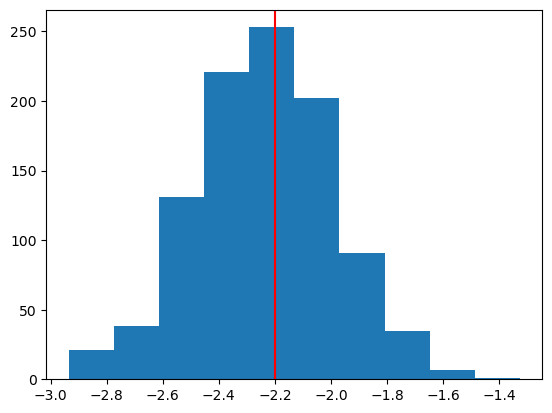

In [22]:
plt.hist(bepi[:,1])
plt.axvline(beta[1], color='red')

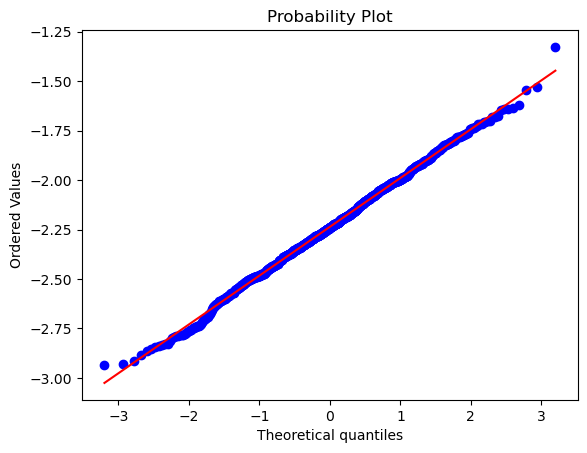

In [23]:
stats.probplot(bepi[:,1], dist = 'norm', plot=plt, fit=True)
# plt.plot([0, 1], [0, 1], color='black')
plt.show()

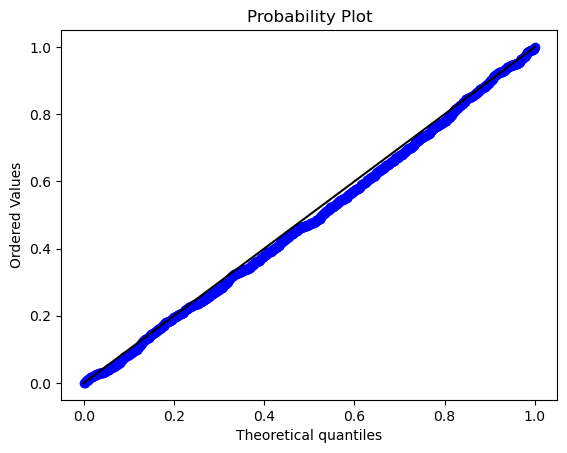

In [24]:
stats.probplot(ps_epi, dist = 'uniform', plot=plt, fit=False)
plt.plot([0, 1], [0, 1], color='black')
plt.show()

In [25]:
np.mean(np.abs(ps_epi) > 0.05)

0.933